<a href="https://colab.research.google.com/github/being3iimed/Tanitjobs-data/blob/main/Processing_doc2vec_%26_Kmeans(train).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

#Kmeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

**Loading training datasets**

**The processed Data to apply the model on**

In [ ]:
dftrain = pd.read_csv("/content/ProcessesdData.csv")
dftrain.shape
# dftrain.info()

(4394, 6)

**Starting processing & training model**

In [ ]:
dftrain = pd.read_excel("/content/Linkedin Job Posts in Saudi Arabia 2020.xlsx", sheet_name="Sheet1")

FileNotFoundError: [Errno 2] No such file or directory: '/content/Linkedin Job Posts in Saudi Arabia 2020.xlsx'

In [ ]:
dftrain.head()

,linkedin_id,position_id,position,company,location,level,date,job_functions,industries,description
0,1632901070,51791,Head of Branding Governance Unit,Riyad Bank,"Riyadh, Saudi Arabia",Mid-Senior level,2020-01-06,"['Marketing', 'Management']",['Banking'],NaN
1,1628497696,51792,Document Controller,"Confidential,Confidential","Riyadh, Saudi Arabia",Associate,2020-01-06,[''],['Government Administration'],Document Controller- (Saudi candidates only) ...
2,1666951758,51793,Employee Engagement Specialist,PepsiCo,"Riyadh, Saudi Arabia",Mid-Senior level,2020-01-06,['Human Resources'],"['Consumer Goods', 'Food & Beverages']",Auto req ID: 199735BRJob DescriptionPepsiCo Sa...
3,1671138260,51794,Strategic Workforce Analyst,Saudi Air Navigation Services,"Jeddah, Saudi Arabia",Mid-Senior level,2020-01-06,[''],['Aviation & Aerospace'],Role PurposeTo conduct workforce analysis to s...
4,1670725370,51795,"Account Manager, GPS – Riyadh",EY,"Riyadh, Saudi Arabia",Not Applicable,2020-01-06,"['Sales', 'Business Development']","['Accounting', 'Financial Services']",In a business where are our people are our pro...


In [ ]:
# Download the 'punkt' resource
# Download the 'stopwords' resource
# Download the 'wordnet' resource
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Lowercasing & str


In [ ]:
dftrain['Preprocessed_Job_Position'] = dftrain['Position'].apply(lambda x: str(x).lower())

# Tokenization

In [ ]:
dftrain['Tokenized_Job_Position'] = dftrain['Preprocessed_Job_Position'].apply(word_tokenize)

# Removing Stop Words


In [ ]:
stop_words = set(stopwords.words('english'))
dftrain['Filtered_Job_Position'] = dftrain['Tokenized_Job_Position'].apply(lambda tokens: [word for word in tokens if word not in stop_words])


# Lemmatization


In [ ]:
lemmatizer = WordNetLemmatizer()
dftrain['Lemmatized_Job_Position'] = dftrain['Filtered_Job_Position'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Tagging Documents


In [ ]:
dftrain['Tagged_Job_Position'] = dftrain.apply(lambda row: TaggedDocument(words=row['Lemmatized_Job_Position'], tags=[row['Position']]), axis=1)

# Create Doc2Vec Model


In [ ]:
model = Doc2Vec(vector_size=50, window=2, min_count=1, workers=4, epochs=100)

# Build vocabulary


In [ ]:
model.build_vocab(dftrain['Tagged_Job_Position'])

# Train the model &  Save the model



In [ ]:
model.train(dftrain['Tagged_Job_Position'], total_examples=model.corpus_count, epochs=model.epochs)
model.save("tanitjobs_position_doc2vec_model.model")

**Loading Model**

In [ ]:
# Loading the trained Doc2Vec model
model = Doc2Vec.load("tanitjobs_position_doc2vec_model.model")

In [ ]:
df = pd.read_csv("/content/ProcessesdData.csv")
df.shape
# dftrain.info()

(4394, 6)

In [ ]:
df = pd.read_excel("/content/Linkedin Job Posts in Saudi Arabia 2020.xlsx", sheet_name="Sheet1")

FileNotFoundError: [Errno 2] No such file or directory: '/content/Linkedin Job Posts in Saudi Arabia 2020.xlsx'

In [ ]:
df['Position'] = df['Position'].astype(str)

In [ ]:
df = df.dropna(subset=['Position'])


In [ ]:
# Apply the model to the DataFrame to get vectors
df['Vector'] = df['Position'].apply(lambda x: model.infer_vector([lemmatizer.lemmatize(word.lower()) for word in word_tokenize(x)]))

In [ ]:
df.head()

,linkedin_id,position_id,position,company,location,level,date,job_functions,industries,description,Position,Vector
0,1632901070,51791,Head of Branding Governance Unit,Riyad Bank,"Riyadh, Saudi Arabia",Mid-Senior level,2020-01-06,"['Marketing', 'Management']",['Banking'],NaN,Head of Branding Governance Unit,"[0.15652075, 0.17450075, 0.24454752, -0.123842..."
1,1628497696,51792,Document Controller,"Confidential,Confidential","Riyadh, Saudi Arabia",Associate,2020-01-06,[''],['Government Administration'],Document Controller- (Saudi candidates only) ...,Document Controller,"[-0.49346095, 0.12423541, 0.05426755, 0.387825..."
2,1666951758,51793,Employee Engagement Specialist,PepsiCo,"Riyadh, Saudi Arabia",Mid-Senior level,2020-01-06,['Human Resources'],"['Consumer Goods', 'Food & Beverages']",Auto req ID: 199735BRJob DescriptionPepsiCo Sa...,Employee Engagement Specialist,"[0.2032133, 0.28455758, 0.26539236, -0.4277665..."
3,1671138260,51794,Strategic Workforce Analyst,Saudi Air Navigation Services,"Jeddah, Saudi Arabia",Mid-Senior level,2020-01-06,[''],['Aviation & Aerospace'],Role PurposeTo conduct workforce analysis to s...,Strategic Workforce Analyst,"[-0.1860599, -0.16683137, 0.15011793, -0.15197..."
4,1670725370,51795,"Account Manager, GPS – Riyadh",EY,"Riyadh, Saudi Arabia",Not Applicable,2020-01-06,"['Sales', 'Business Development']","['Accounting', 'Financial Services']",In a business where are our people are our pro...,"Account Manager, GPS – Riyadh","[-0.1546668, 0.19996652, 0.4559487, -0.0193021..."


In [ ]:
# vector to a list
vectors = df['Vector'].tolist()

In [ ]:
vectors

In [ ]:
categories = ["healthcare", "materials", "real estate", "consumer staples", "consumer discretionary",
              "utilities", "energy", "industrials", "consumer services", "financials", "technology"]
# Dict to map categories to cluster numbers
category_to_cluster = {category: idx for idx, category in enumerate(categories)}

In [ ]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

**Applying KMeans clustering**

In [ ]:
kmeans = KMeans(n_clusters=len(categories), random_state=42)
df['Cluster'] = kmeans.fit_predict(vectors)

# Map cluster numbers to categories
df['Category'] = df['Cluster'].map({v: k for k, v in category_to_cluster.items()})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Visualization**

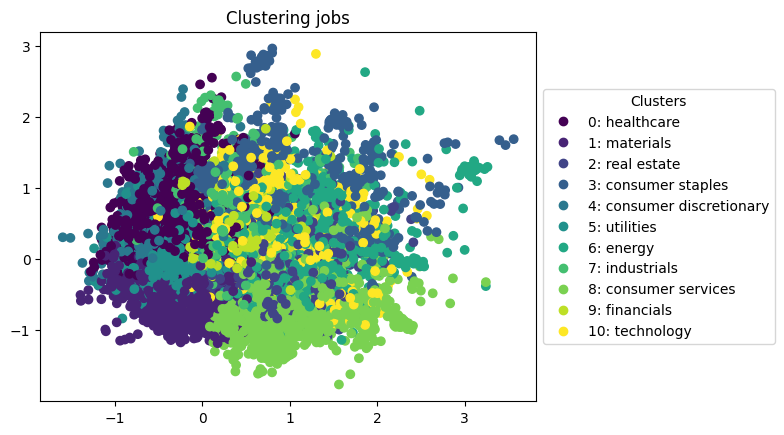

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=df['Cluster'], cmap='viridis')

# legend outside the plot
legend_labels = [f"{i}: {category}" for i, category in enumerate(categories)]
legend = ax.legend(handles=scatter.legend_elements()[0], title="Clusters", labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Clustering jobs')
plt.show()

In [ ]:
df[['Position', 'Category']].head(10)

,Position,Category
0,Head of Branding Governance Unit,materials
1,Document Controller,materials
2,Employee Engagement Specialist,consumer services
3,Strategic Workforce Analyst,energy
4,"Account Manager, GPS – Riyadh",materials
5,Head Of Content,consumer discretionary
6,Management Assistant,utilities
7,Business Analyst,energy
8,Talent Acquisition Advisor,industrials
9,"Associate, Sales Analysis",materials


# **Logistic Regression**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


class LogisticRegressionModel :
  #todo
  def __init__(self, modelPath) :
    self.model = Doc2Vec.load(modelPath)
    self.embeddings = df['Preprocessed_Job_Position'].apply(lambda x: model.infer_vector([lemmatizer.lemmatize(word.lower()) for word in word_tokenize(x)]))
    self.df_embedded = pd.DataFrame({'embeddings': self.embeddings, 'job_category': df['Category']})
    self.logreg_model = LogisticRegression()

  def train_test(self) :
    return train_test_split(self.df_embedded['embeddings'].tolist(), self.df_embedded['job_category'], test_size=0.2, random_state=42)

  def train_model(self, Xtrain, y_train) :
    self.logreg_model.fit(X_train, y_train)

  def make_prediction_test(self, X_test) :
    return self.logreg_model.predict(X_test)

  def evaluate_model_accur(self, y_test, predictions):
    return accuracy_score(y_test, predictions)

  def evaluate_model_class_report(self, y_test, predictions):
    return classification_report(y_test, predictions)

  def predict(self, new_embeddings):
    return self.logreg_model.predict(new_embeddings)

  def predict_prob(self, new_embeddings):
    return self.logreg_model.predict_proba(new_embeddings)


logisticRegression = LogisticRegressionModel("job_position_doc2vec_model.model")

X_train, X_test, y_train, y_test = logisticRegression.train_test()
logisticRegression.train_model(X_train, y_train)
predictions = logisticRegression.make_prediction_test(X_test)

accuracy = logisticRegression.evaluate_model_accur(y_test, predictions)
class_report = logisticRegression.evaluate_model_class_report(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{class_report}')

# Predict on new job descriptions
# new_job_descriptions = ['A new job description', 'Another job description']
new_job_descriptions = ['finance', 'finance']
new_embeddings = [logisticRegression.model.infer_vector(desc.split()) for desc in new_job_descriptions]

new_predictions = logisticRegression.predict(new_embeddings)
new_probabilities = logisticRegression.predict_prob(new_embeddings)

print(f'Predictions for new job descriptions: {new_predictions}')
print(f'Probabilities for new job descriptions: {new_probabilities}')


FileNotFoundError: [Errno 2] No such file or directory: 'job_position_doc2vec_model.model'

In [ ]:
df = pd.read_csv("/content/finalData.csv")
df.head()

,Position,Entreprise,Location,Date,Candidates,Postes,Type,Experience,Niveau,Rémunération,Langue,Genre
0,PFE internship in UI/UX Web Design,MAT-IT,"Ariana, Tunisie",Il'y a 30 minutes,0,1 poste ouvert,"Temps plein, Freelance / Indépendant",None,"Licence, Bac + 3",None,None,None
1,PFE internship: ERP Development of Research La...,Qubitron,"Tunis, Tunisie",Il'y a 32 minutes,0,1 poste ouvert,CDD,None,None,None,None,None
2,Full-Stack coder,Synexta,"Médenine, Tunisie",Il'y a 47 minutes,0,1 poste ouvert,"CDI, CDD, SIVP",1 à 3 ans,Ingénieur,Confidentiel,Français,None
3,PFE Student Engineer internship - Web developm...,MAT-IT,"Ariana, Tunisie",Il'y a 47 minutes,0,1 poste ouvert,Temps plein,Débutant,Ingénieur,None,None,None
4,University cafeteria waitress,Collège de Paris Campus Tunis,Mohamed V à côté de British Council Tunis bel...,Il'y a 2 heures,0,1 poste ouvert,CDD,0 à 1 an,None,None,None,None


In [ ]:
import string
import re
from datetime import datetime, timedelta

class Classify :

  def __init__(self):
    self.JOB_PATTERNS = {
        'Computer science': r'\b(it|software|computer science|software|developer|programm([a-z]*?))\b',
        'Business': r'\b(business|manager|sales|marketing|com)\b',
        'Web Development': r'\b(web|front([a-z]*?)end|back([a-z]*?)end|full([a-z]*?)stack|site)\b',
        'Design': r'\b(design([a-z]*?)|graph([a-z]*?))\b',
        'Health': r'\b(medical|health|doctor|nurse|med([a-z]*?))\b',
        'Finance': r'\b(finance|accounting|banking)\b',
        'Education': r'\b(teach|education|teacher|instructor)\b',
        'Engineering': r'\b(engineer|engineering|mechanical|electrical)\b',
        'Art': r'\b(art|artist([a-z]*?)|creative)\b',
        'Customer Service': r'\b(customer service|support|help center)\b',
        'Hospitality': r'\b(hotel|hotel|restaurant)\b',
        'Legal': r'\b(legal|lawyer|legal)\b',
        'Science': r'\b(science|scientist|research)\b'
    }
    # self.characters_to_remove = ",()|'"
    self.characters_to_remove = string.punctuation

  def classify(self, input) :
    encoding = list(self.JOB_PATTERNS.keys())
    if(len(encoding) > 50): return 51
    translation_table = str.maketrans('', '', self.characters_to_remove)
    input = input.translate(translation_table)
    input = input.split()
    for inp in input:
      if len(inp) > 2 :
        for job, pattern in self.JOB_PATTERNS.items():
            if re.search(pattern, inp, re.IGNORECASE):
                return encoding.index(job)

    #adding patterns
    domaine = input[len(input)-1]
    patterns = r'\b('
    for inp in input:
        if len(inp) > 2 :
            patterns += '{}|'.format(inp)

    patterns = patterns[:-1]
    patterns += r')\b'
    self.JOB_PATTERNS[domaine] = patterns
    return (len(self.JOB_PATTERNS)-1)


  def convert_to_hour(self, input):
    input = input.split()
    test = input[len(input)-1]
    res = int(input[len(input)-2])
    if   test[0] == 'h' : return res
    elif test[0] == 'j' : return res*24
    elif test[0] == 's' : return res*7*24
    elif test == 'mois' : return res*24*30
    else                : return res/60 #minutes

  def subtract_hours_from_current_datetime(self, hours_to_subtract):
    current_datetime = datetime.now()

    new_datetime = current_datetime - timedelta(hours=hours_to_subtract)
    date_time_format = "%Y-%m-%d"
    formatted_datetime = new_datetime.strftime(date_time_format)

    return formatted_datetime

  def getNum(self, input) :
    input = input.split()
    return int(input[0])

  def toRange(self, input) :
    input = input.split()
    test = input[len(input)-1]
    if test == 'ans' or test == 'an' :
      try :
        f = int(input[0])
        t = int(input[2])
        return (f+t)//2 # get the average
      except :
        return int(input[1]);
    return 0


classify = Classify()

In [ ]:
data = df.copy()
data.info()
data['Date'] = data['Date'].apply(lambda x: classify.convert_to_hour(x))
# data['Date'] = data['Date'].apply(lambda x: classify.subtract_hours_from_current_datetime(classify.convert_to_hour(x)))

data['Postes'] = data['Postes'].apply(lambda x: classify.getNum(x))

# get experience range
data['Experience'] = data['Experience'].apply(lambda x: classify.toRange(x))

print(classify.classify("enter taf sfsd"))
data['Code'] = data['Position'].apply(lambda x : classify.classify(str(x)))
column_to_move = 'Code'
moved_column = data.pop(column_to_move)
data.insert(1,column_to_move, moved_column)
data.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4618 entries, 0 to 4617
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Position      4615 non-null   object
 1   Entreprise    4618 non-null   object
 2   Location      4618 non-null   object
 3   Date          4618 non-null   object
 4   Candidates    4618 non-null   int64 
 5   Postes        4618 non-null   object
 6   Type          4618 non-null   object
 7   Experience    4618 non-null   object
 8   Niveau        4618 non-null   object
 9   Rémunération  4618 non-null   object
 10  Langue        4618 non-null   object
 11  Genre         4618 non-null   object
dtypes: int64(1), object(11)
memory usage: 433.1+ KB
13


,Position,Code,Entreprise,Location,Date,Candidates,Postes,Type,Experience,Niveau,Rémunération,Langue,Genre
0,PFE internship in UI/UX Web Design,2,MAT-IT,"Ariana, Tunisie",0.500000,0,1,"Temps plein, Freelance / Indépendant",0,"Licence, Bac + 3",None,None,None
1,PFE internship: ERP Development of Research La...,12,Qubitron,"Tunis, Tunisie",0.533333,0,1,CDD,0,None,None,None,None
2,Full-Stack coder,2,Synexta,"Médenine, Tunisie",0.783333,0,1,"CDI, CDD, SIVP",2,Ingénieur,Confidentiel,Français,None
3,PFE Student Engineer internship - Web developm...,7,MAT-IT,"Ariana, Tunisie",0.783333,0,1,Temps plein,0,Ingénieur,None,None,None
4,University cafeteria waitress,14,Collège de Paris Campus Tunis,Mohamed V à côté de British Council Tunis bel...,2.000000,0,1,CDD,0,None,None,None,None
5,Direction assistant,15,SYMAE AUDIT,"Mahdia, Tunisie",2.000000,0,3,"CDI, Temps plein, SIVP",0,"Maîtrise, IEP, IUP, Bac + 4",Entre 500 DT et 1000 DT,Français,None
6,Thermal engineer,7,SYMAE AUDIT,"Mahdia, Tunisie",2.000000,0,3,"CDI, Temps plein, SIVP",0,"Maîtrise, IEP, IUP, Bac + 4",Entre 500 DT et 1000 DT,None,None
7,Commercial assistant,15,Tanitoss,"Tunis, Tunisie",3.000000,0,1,"CDD, Temps plein, Temps partiel, SIVP",0,"Licence, Bac + 3",None,Français,Féminin
8,Driver Grand Tunis,16,Sté Ecovillage,"Tunis, Tunisie",3.000000,50,1,CDD,2,None,None,None,Masculin
9,Data annotation (junior),17,MWSS,"Bizerte, Tunisie",3.000000,50,1,Temps plein,0,"Licence, Bac + 3",Confidentiel,"Français, Anglais",Indifférent


In [ ]:
data.drop(['Position', 'Entreprise', 'Location', 'Type','Niveau', 'Rémunération', 'Langue', 'Genre'], axis='columns', inplace=True)

Mean Squared Error: 376.1987810494845


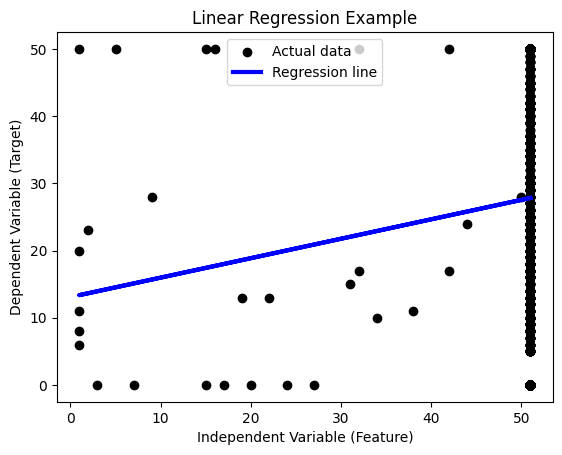

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = data[['Code']]
# X = data.drop('Candidates', axis=1)
# X = data[['Code', 'DateCandidates']
y = data["Candidates"]
# y = data['
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")# Plot the original data and the regression line
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.xlabel('Independent Variable (Feature)')
plt.ylabel('Dependent Variable (Target)')
plt.title('Linear Regression Example')
plt.legend()
plt.show()